In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# For importing example data
import sqlalchemy
import sqlalchemy_utils
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

In [3]:
# Define a database name
# Set your postgres username
dbname = "baseball"
username = "lacar"  # change this to your username

# Working with PostgreSQL in Python
# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database=dbname, user=username)

# Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine("postgres://%s@localhost/%s" % (username, dbname))
print(engine.url)

postgres://lacar@localhost/baseball


[Writing math symbols in markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)

# Linear regression

Let's imagine a simple case such as using housing square footage to predict prices.

Ues Padres database.

In [20]:
# Use Padres data from 2018
sql_query = """
SELECT * FROM batting_stats18_wpid
WHERE "Team"='Padres';
"""
df_padres = pd.read_sql_query(sql_query,con)
df_padres.head()

,index,index_x,Season,Name,Team,Age,G,AB,PA,H,...,first_name,index_y,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,123,1094,2018.0,Austin Hedges,Padres,25.0,91.0,303.0,326.0,70.0,...,austin,784,hedges,austin,595978,hedga001,hedgeau01,12976,2015.0,2019.0
1,164,553,2018.0,Hunter Renfroe,Padres,26.0,117.0,403.0,441.0,100.0,...,hunter,1444,renfroe,hunter,592669,renfh001,renfrhu01,15464,2016.0,2019.0
2,166,692,2018.0,Wil Myers,Padres,27.0,83.0,312.0,343.0,79.0,...,wil,1233,myers,wil,571976,myerw001,myerswi01,10047,2013.0,2019.0
3,409,1507,2018.0,Luis Urias,Padres,21.0,12.0,48.0,53.0,10.0,...,luis,1809,urias,luis,649966,urial001,uriaslu01,16622,2018.0,2019.0
4,192,331,2018.0,Franmil Reyes,Padres,22.0,87.0,261.0,285.0,73.0,...,franmil,1448,reyes,franmil,614177,reyef001,reyesfr01,14566,2018.0,2019.0


In [22]:
[print(i) for i in df_padres.columns]

index
index_x
Season
Name
Team
Age
G
AB
PA
H
1B
2B
3B
HR
R
RBI
BB
IBB
SO
HBP
SF
SH
GDP
SB
CS
AVG
GB
FB
LD
IFFB
Pitches
Balls
Strikes
IFH
BU
BUH
BB_perc
K_perc
BB/K
OBP
SLG
OPS
ISO
BABIP
GB/FB
LD_perc
GB_perc
FB_perc
IFFB_perc
HR/FB
IFH_perc
BUH_perc
wOBA
wRAA
wRC
Bat
Fld
Rep
Pos
RAR
WAR
Dol
Spd
wRC+
WPA
-WPA
+WPA
RE24
REW
pLI
phLI
PH
WPA/LI
Clutch
FB_perc _Pitch
FBv
SL_perc
SLv
CT_perc
CTv
CB_perc
CBv
CH_perc
CHv
SF_perc
SFv
KN_perc
KNv
XX_perc
PO_perc
wFB
wSL
wCT
wCB
wCH
wSF
wKN
wFB/C
wSL/C
wCT/C
wCB/C
wCH/C
wSF/C
wKN/C
O-Swing_perc
Z-Swing_perc
Swing_perc
O-Contact_perc
Z-Contact_perc
Contact_perc
Zone_perc
F-Strike_perc
SwStr_perc
BsR
FA_perc _pfx
FT_perc _pfx
FC_perc _pfx
FS_perc _pfx
FO_perc _pfx
SI_perc _pfx
SL_perc _pfx
CU_perc _pfx
KC_perc _pfx
EP_perc _pfx
CH_perc _pfx
SC_perc _pfx
KN_perc _pfx
UN_perc _pfx
vFA _pfx
vFT _pfx
vFC _pfx
vFS _pfx
vFO _pfx
vSI _pfx
vSL _pfx
vCU _pfx
vKC _pfx
vEP _pfx
vCH _pfx
vSC _pfx
vKN _pfx
FA-X _pfx
FT-X _pfx
FC-X _pfx
FS-X _pfx
FO-X _pfx
SI-X 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

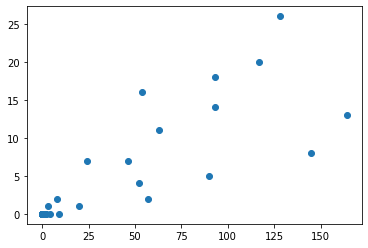

In [24]:
plt.scatter(df_padres['FB'], df_padres['HR'])

# ISLR (Ch 3): Linear Regression

Classic technique that is still powerful and serves as a starting point for newer approaches. Questions that can be addressed using the Advertising data from the previous chapter:

1. Is there a relationship between advertising budget and sales?
2. How string is the relationship between advertising budget and sales?
3. Which media contribute to sales?
4. How accurately can we estimate the effect of each medium on sales?
5. How accurately can we predict future sales?
6. Is the relationship linear?
7. Is there synergy among the advertising media? (interaction effect)


## Simple linear regression

We are seeking to predict Y on the basis of a single predictor variable X. It assumes there's an approximate linear relationship between X and Y.

$Y \approx \beta_0 + \beta_1X$

### Estimating the coefficients

Use least squarest to estimate. Find $\hat{\beta_0}$ and $\hat{\beta_1}$ such that the residual sum of squares (RSS) is minimized.

### Assessing the accuracy of the coefficient estimates

The true relationship between X and Y includes some $\epsilon$ which is a mean-zero random error term.

$Y = \beta_0 + \beta_1X$ + $\epsilon$

Note that we replace "approximately equal" with just "equal" when we have the error term. The error term $\epsilon$ is a catch-all for what we miss with the simple model. We typically assume that the error term is independent of X.

Remember that there is a true population regression line and that an regression line is a sample of that. Therefore there is some error associated with the regression line, consistent with standard statistical approaches of using a sample to estimate characteristics of a larger population. The analogy between linear regression and estimation of the mean of a random variableis an apt one based on the concept of *bias*. Just as $\hat\mu$ is an unbiased estimate of $\mu$, we can say the same for the linear regression coefficients we are estimating $\hat{\beta_0}$ and $\hat{\beta_1}$ for ${\beta_0}$ and ${\beta_1}$, respectively.

Continuing with the analogy of estimating the sample mean for our random variable Y, a natural question is how accurate is the sample mean $\hat\mu$ for $\mu$? We have established that the average of many $\hat\mu$ over many data sets will be very close to $\mu$, but that a single estimate $\hat\mu$ may be a substantial under- or overestimate of $\mu$. How far will that single estimate of $\hat\mu$ be? That is when we compute the *standard error*.

$Var(\hat\mu) = SE(\hat\mu)^2 = \frac{\sigma^2}{n}$

In a similar vein, we can calculate the standard errors associated with $\hat{\beta_0}$ and $\hat{\beta_1}$ using the following formulas:

$SE(\hat{\beta_0})^2 = \sigma^2[\frac{1}{n} + \frac{\bar{x}^2}{\Sigma(x_i-\bar{x}^2}]$

$SE(\hat{\beta_1})^2 = \sigma^2[\frac{1}{n} + \frac{\bar{x}^2}{\Sigma(x_i-\bar{x}^2}]$

Other key concepts:
- SEs can be used to compute confidence intervals, make hypothesis tests, apply t-statistics and get p-values.

### Assessing the accuracy of the model

**Residual standard error**
- What is the formula for RSE?
- Based on the formula, can you tell for which term in the linear regression model it is a standard deviation?

**$R^2$ statistic**
- Is $R^2$ a number or proportion? Why? What is it a proportion of?
    - It's the proportion of variance in Y explained by the target.
    - It has the formula $R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}$
    
- What is the formula to calculate $R^2$?
- How does $R^2$ relate to the definition of correlation in a simple linear model? Can it be applied to a multiple linear regression problem?
 


## Multiple linear regression

This approach helps extend analysis to accomdate additional predictors. Each predictor (variable) is given a separate slope coefficient in a single model. **We interpret each coefficient $\beta_j$ as the average effect on the target $Y$ of a one unit increase in its associated feature $X_j$, holding all other features constant.** 

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$

### Estimating the regression coefficients

The parameters are estimated least squares. **Note that a feature can look significant when run alone in a simple linear regression but not significant in a multiple regression model! (In other words, the coefficients and p-values of a feature can be quite different between a simple and multiple regression model.)** Below are tables from the `Advertising` data described in the book (pg. 72).

<br>
<center> From Table 3.3: Simple regression of sales on newspaper </center>

| | Coefficient | SE | t-statistic | p-value |
|--|-------|---|-------|------- |
|intercept | 12.351 | 0.621 | 19.88 | <0.0001 |
|newspaper | 0.055 | 0.017 | 3.30 | 0.00115 |

<br>
<center> Table 3.4: Multiple regression model of sales </center>

| | Coefficient | SE | t-statistic | p-value |
|--|-------|---|-------|------- |
|intercept | 2.939 | 0.3119 | 9.42 | <0.0001 |
|TV        | 0.046 | 0.0014 | 32.91 | <0.0001 |
|radio     | 0.189 | 0.0086 | 21.89 | <0.0001 |
|newspaper | -0.001 | 0.0059 | -0.18 | 0.8599 |

How do we interpret this? For radio, as we see in Table 3.4, we would say that spending an additional \$1000 on radio advertising leads to an increase in sales by approximately 189 units (it is 1000 since the numbers are in thousands). (This is not too far off from its coefficient in the simple linear regression model data not shown.) But for newspaper, the regression coefficient was significantly non-zero in a simple regression model but very close to zero in the multiple regression model.

**How can this be?** This situation can be quite common. The difference stems from the fact that the slope term represents the average effect of a \$1000 increase in newspaper advertising, *ignoring* other predictors such as TV and radio. In contrast, in the multiple regression setting, the coefficient represent the average effect of increasing newspaper spending by \$1000 while holding TV and radio fixed.

**Does it make sense for the multiple regression to suggest no relationship between sales and newspaper while the simple linear regression implies the opposite?** It can. Consider a correlation matrix (not shown) that shows that there is a correlation between radio and newspaper of 0.35. This shows that there's a tendency to spend more on newspaper advertising in markets where more is spent on radio advertising. In a simple regression model where radio advertising is ignored, the newspaper advertising "gets credit" for the radio advertising even though newspaper ads are not really impacting sales. Newspaper sales are therefore just a surrogate for radio advertising in a simple regression model.

Here's a more extreme example to further illustrate the point. If you run a regression of shark attacks versus ice cream sales, you would see a positive correlation. But it would be absurd to ban ice cream sales to reduce the incidence of shark attacks. In reality, the higher temperatures cause more people to visit the beach, increasing both shark attacks and beach sales. A multiple regression of attacks versus ice cream sales and temperature reveals, as intuitin implies, that the former predictor is no longer significant after adjusting for temperature.

### Some important questions

With multiple linear regression, we're usually interested in answering a few important questions.
1. Is at least one of the predictors useful in predicting the response?
2. Do all the predictors help to explain Y or is only a subset of the predictors useful?
3. How well does the model fit the data?
4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction?
5. Other: How does regularization impact the interpretation of coefficients?

**One: Is there a relationship between the response and predictors?**

In order to determine whether there's a relationship between the response(s) and predictor, we would do the following for each setting:

simple linear regression: check whether $\beta_1 = 0$
<br>
multiple linear regression: check whether $\beta_1 = \beta_2 = \beta_3 ... \beta_j = 0$

For the multiple linear regression setting, we can pose null and alternate hypotheses.
<br>
Null: All coefficients are equal to 0.
<br>
Alternate: At least *one* coefficients is non-zero.

The hypothesis test is performed by computing the F-statistic. (Note that this sounds very similar to ANOVA because it is, in fact, the same thing.)

$ F = \frac{(TSS - RSS)/p}{(RSS)/(n-p-1)} = \frac{variance\ across\ groups}{variance\ within\ groups} $

If the linear model assumptions are corrrect, one can show that:

$ E\{RSS/(n-p-1)\} = \sigma^2 $

and that, provided $H_0$ is true,

$ E\{(TSS-RSS)/p\} = \sigma^2 $

Therefore, when there's no relationship between the response and predictors, we can expect the F-statistic to take on a value close to 1. When the F-statistic is very large (as in the advertisements dataset), the p-values are small, providing compelling evidence against the null hypothesi. This suggests *at least one* of the features must be related to sales. But recall that there's a relationship between the degrees of freedom and the F-statistic (the F-distribution itself being the quotient of two chi-squared distributions). When n is large, a smaller F-statistic can still lead to rejection of the null hypothesis.

Sometimes we may want to test whether a particular subset of the coefficients are zero. In this case, we can have a second model that uses all variables *except q* variables. Suppose the residual sum of squares for that model is $RSS_0$. You can calculate the F-statistic for this new model.

$ F = \frac{(RSS_0 - RSS)/q}{(RSS)/(n-p-1)} $

In Table 3.4, for each individual predictor a t-statistic and a p-value were reported, to provide info about whether  each individual predictor is related to the response after adjusting for all other features. Interestingly, these are exactly equivalent to the F-test that omits that single variable from the model, leaving all the others in. (The square of each t-statistic is its corresponding F-statistic.) Therefore, it reports the partial effect of adding that variable to the model. For instance, as shown above, the p-values indicate that TV and radio are related to sales, but not newspaper in the presence of the other two.

Given that we can get the individual p-values for each variable, why do we need to look at the overall F-statistic? After all, if any of the p-values for the individual variables is very small, then we can say that at least one of the predictors is related to the response, right? No, and in short, because of multiple hypothesis testing. If the number of predictors/variables is very large, then you have the potential for one of the p-values from the individual t-statistics to find a significant variable by chance. The F-statistic approach does not suffer from this problem because it adjusts for the number of predictors.

The approach of using an F-statistic to test for an association between the predictors and response works when *p* is relatively small, and certainly small compared to *n*. But what happens if the number of predictors is larger compared to the number of samples? Then there are more coefficients to estimate than observations from which to estimate them and in this case, we cannot even fit the multiple linear regression model using least squares. The F-statistic cannot be used (and neither can most other concepts that we have seen so far in this chapter). When *p* is large, you might be able to use *forward selection*. A discussion of the *high-dimensional* setting is also discussed in Chapter 6.

**Two: Deciding on important variables**

We know that we can look at the F-statistic to see if there is at least *one* feature that significantly related to the response. We can look at p-values of each feature but if the number of features is large, we can make some false discoveries. We could apply a process of *variable* or *feature selection*. We can try different combinations of features but practically that would be time consuming. Instead, we can apply classical approaches for this task:

- *Forward selection*. Start with a null model, one that contains an intercept but no predictors. Then fit *m* simple linear regressions (m=number of features) and add to the null model the variable that results in the lowest RSS. Add a second variable that results in the lowest RSS for the next two-variable model. Keep doing this until some stopping rule is satisifed.
- *Backward selection*. Instead start with all variables in the model, then remove the variable with the largest p-value (least significant). Keep doing this until some stopping rule is reached (e.g. when the remaining variables have a p-value below some threshold.
- *Mixed selection*. A combination of forward and backward selection. Start with no variables in the model, then add variable that best fits like in forward selection. Keep adding until a variable added rises above a p-value threshold, then remove it. Continue performing forward and backward steps until all variables have a sufficiently low p-value and all variables outside the model would have a large p-value if added to the model. (*Not entirely sure I understand this.*)

Note: Backward selection cannot be used if m > n, while forward selection can always be used. Forward selection is a greedy approach, and might include variables early that later become redundant. Mixed selection can remedy this.

More detail about this is discussed in Chapter 6.

**Three: Model fit**

Two of the most common numerical measures of model fit are the RSE and $R^2$, the fraction of variance explained. Recall that in simple regression, $R^2$is the square of the correlation of the response and the variable. In multiple linear regression, it equals $Cor(Y, \hat{Y})^2$, the square of the correlation between the response and the fitted linear model; in fact one property of the fitted linear model is that it maximizes thsi correlation among all possible linear models.

An $R^2$ close to 1 indicates that the model explains a large portion of the variance in the response variable. This is true even in the Advertising data where using all three variables gives an $R^2$ of 0.8972 while omitting newspaper gives $R^2$ of 0.89719. There's a small increase when we include newspaper even though we know that the p-value for newspaper advertising is not significant. It turns out that $R^2$ will always increase when more variables are added to the model, even if those variables are only weakly associated with the response. In contrast, when using only TV, the $R^2$ was 0.61 and adding radio leads to a substantial improvement. We can further quantify this improvement by looking at the p-value for the radio coefficient in a model that contains only TV and radio as predictors.
  
What about RSE? The model that contains only TV and radio has an RSE of 1.681 while including newspaper has one of 1.686. How can RSE increase when newsppaer is added given that RSS must decrease? In general, RSE is defined as:
    <br>
    $RSE = \sqrt{\frac{1}{n-p-1}RSS}$
    <br>
Thus, models with more variables can have higher RSE if the decrease in RSS is small relative to the increase in m. The square root in the equation means that an added or removed feature will impact RSS and RSE in a non-linear fashion.

Plotting the data also helps. Graphical summaries can reveal problems with a model that are not visible from numerical statistics. In the 3D plot, some observations lie below the least squares regression plane while some are above. It overestimates sales for instances in which most of the advertising money is spent exclusively on either TV or radio while underestimating sales when the budget was split between the two media. The pronounced non-linear pattern cannot be modeled accurately using linear regression. It suggests a *synergy* or *interaction* effect between the advertising media, whereby combining the media together results in a bigger boost to sales than using any single medium. Later we'll discuss accomdating synergistic effects through the use of interaction terms.
    
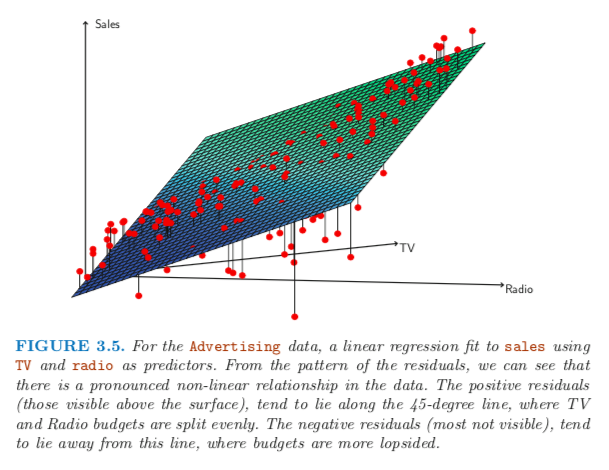

RSE = residual standard error (looks same? as root mean square error)
<br>
RSS = residual sum of squares (looks same? as mean square error)


**Four: Predictions**

Once we have fit the multiple regression model, it is straightforward to apply the equation to predict the response *Y* on the basis of a set fo values for the predictors $X_1, X_2,...X_p$. However, there are three sorts of uncertainty associated with this prediction.

1. The coefficient estimates ${\hat\beta_0}$, ${\hat\beta_1}$,... ${\hat\beta_m}$ are only estimates for ${\beta_0}$, ${\beta_1}$,... ${\beta_m}$. The *least squares plane* is only an estimate for the *true population regression plane.* The inaccuracy in the coefficient estimates is related to the *reducible error* from Chapter 2. We can compute a *confidence interval* in order to determine how close $\hat{Y}$ will be to *f(X)*.

2. Even if we knew the true values, the response value cannot be predicted perfectly because of the random error $\epsilon$ in the model (the irreducible error). How much will $Y$ vary from $\hat{Y}$? We use *prediction intervals* to answer this question. Prediction intervals are always wider than confidence intervals, because they incorporate both the error in the estimate for f(X) (the reducible error) and the uncertainty as to how much an individual point will differ from the population regression plane (the irreducible error).
    - Confidence interval: use to quantify the uncertainty surrounding the average sales over a large number of cities (given that 100K and 20K is spent on TV and radio in each city, the CI for sales could be (10985, 11528))
    - Prediction interval: use to quantify the uncertainty surrounding sales for a particular city (given that 100K and 20K is spent on TV and radio in a particular city, the PI for sales could be (7930, 14580))

Note that both intervals are centered at 11256 but that the prediction interval is substantially wider tha the confidence interval, reflecting the increased uncertainty about sales for a given city in comparison to the average sales over many locations.

**Other: Interpret the coefficients in both the simple and multiple regression setting. How much would we expect an additional \$1000 of advertising spending in each category to increase sales?**

## Other considerations in the regression model

### Qualitative predictors

Suppose we evaluate the Credit data set, which has balance and quantitative predictors like age, education, income, etc. There are also qualitative predictors like gender, student status, and ethnicity.

**Predictors with only two levels**

Suppose we're looking at gender and we arbitrarily code male as 0 and female as 1. 

For the female, the equation would look like this: $y_i = \beta_0 + \beta_1x_1$
<br>
For the male, the equation would look like this: $y_i = \beta_0$

The choice of coding is arbitrary, it is just how we interpret the coefficients.


**Predictors with more than two levels**


### Extensions of the linear model

**Removing the additive assumption**

**Non-linear relationships**


### Potential problems

1. Non-linearity of the response-predictor relationships
2. Correlation of error terms
3. Non-constant variance of error terms
4. Outliers
5. High-leverage points
6. Collinearity


# K means vs. heirarchical clustering

See this video
https://www.youtube.com/watch?v=QXOkPvFM6NU&t=933s

See this site
https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/

# PCA

Amazing explanation
<br>
https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
    
<br>
Good video on covariance matrix
<br>

https://www.youtube.com/watch?v=152tSYtiQbw


# ISLR (Ch 8): Tree-Based Methods

- Applies to regression and classification
- Involves *stratifying* or *segmenting* the predictor space into a number of simple regions
- To make a prediction for a given observation, we typically use the mean or mode of the training observations in the region to which it belongs.
- The set of splitting rules used to segment the predictor space can be summarized in a tree
- Decision trees are simple and useful for interpretation, but on their own they're not great for prediction accuracy. But they perform better when multiple trees are used as in bagging, random forests, and boosting. These dramatically improve prediction at the expense of some loss in interpretation.

## The basics of decision trees

Regression and classification applications

### Regression trees

Use a baseball dataset, predicting a hitter's salary based on the number of years played and number of hits.

In [3]:
# Example data from R ISLR package
df_hitters = pd.read_csv('ISLR_data/Hitters.csv')
df_hitters.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.0,NaN


**Let's manually construct the decision tree!**
<br>
Plot the raw data and add the mean of each feature to the plot. Plot histograms of each feature too, to see if transformation is necessary.

In [4]:
mean_years = df_hitters['Years'].mean()
mean_hits = df_hitters['Hits'].mean()
print('Mean years: ', mean_years, ' and mean hits: ', mean_hits)

Mean years:  7.444099378881988  and mean hits:  101.0248447204969


/Users/lacar/anaconda/envs/insight/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lacar/anaconda/envs/insight/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


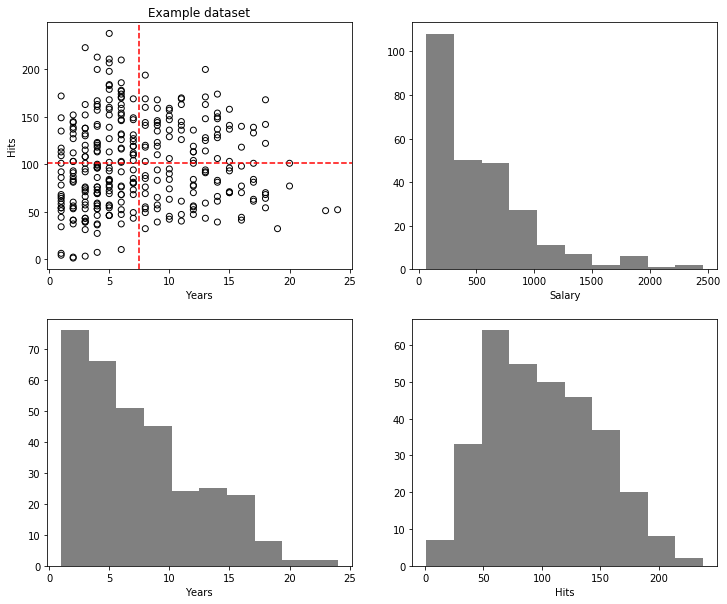

In [5]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))
ax1.scatter(df_hitters['Years'], df_hitters['Hits'], facecolors='none', edgecolors='k')
ax1.set_xlabel('Years')
ax1.set_ylabel('Hits')
ax1.set_title('Example dataset')
ax1.axvline(mean_years, color='r', linestyle='dashed')
ax1.axhline(mean_hits, color='r', linestyle='dashed')

ax2.hist(df_hitters['Salary'], color='gray')
ax2.set_xlabel('Salary')

ax3.hist(df_hitters['Years'], color='gray')
ax3.set_xlabel('Years')

ax4.hist(df_hitters['Hits'], color='gray')
ax4.set_xlabel('Hits');

In [6]:
# Drop na and log transform salary
df_hitters = df_hitters.loc[df_hitters['Salary'].dropna().index, :].copy()
df_hitters['log_Salary'] = np.log(df_hitters['Salary'])
df_hitters.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,log_Salary
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,414,375,N,W,632,43,10,475.0,N,6.163315
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,266,263,A,W,880,82,14,480.0,A,6.173786
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,838,354,N,E,200,11,3,500.0,N,6.214608
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,46,33,N,E,805,40,4,91.0,NaN,4.510860
5,Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,336,194,A,W,282,421,25,750.0,A,6.620073


Text(0.5, 0, 'log_Salary')

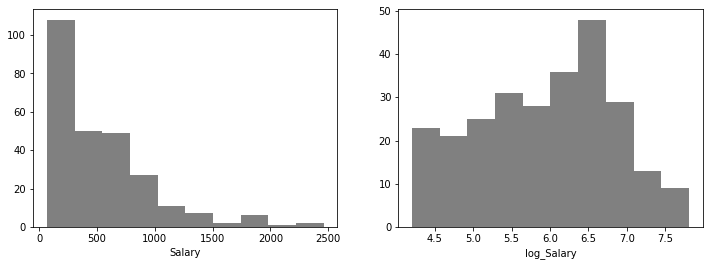

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.hist(df_hitters['Salary'], color='gray')
ax1.set_xlabel('Salary')

ax2.hist(df_hitters['log_Salary'], color='gray')
ax2.set_xlabel('log_Salary')


**Prediction via stratification of the feature space**

Roughly speaking, there are two steps to building a regression tree.

1. Divide the predictor space--that is, the set of possible values for $X_1, X_2, ...., X_p$ --into $J$ distinct and non-overlapping regions, $R_1, R_2, ..., R_J$.
2. For every observation that falls into the region $R_J$, we make the same prediction, which is simply the meanof the response values for the training observations in $R_J$.

In [8]:
# Let's first cut at years - at value of 4.5

yrs_split = 4.5

r1_left = df_hitters[df_hitters['Years'] < yrs_split].copy()
r1_right = df_hitters[df_hitters['Years'] > yrs_split].copy()

r1_left_mean_y = r1_left['log_Salary'].mean()
r1_right_mean_y = r1_right['log_Salary'].mean()

# Calculate RSS (residual sum of squares)
rss_left = sum((r1_left['log_Salary'] - r1_left_mean_y)**2)
rss_right = sum((r1_right['log_Salary'] - r1_right_mean_y)**2)

total_rss = rss_left + rss_right


In [9]:
# Find values of multiple split points for year
total_rss_list = list()

for yrs_split in range(1, 20):
    r1_left = df_hitters[df_hitters['Years'] < yrs_split].copy()
    r1_right = df_hitters[df_hitters['Years'] > yrs_split].copy()

    r1_left_mean_y = r1_left['log_Salary'].mean()
    r1_right_mean_y = r1_right['log_Salary'].mean()

    # Calculate RSS (residual sum of squares)
    rss_left = sum((r1_left['log_Salary'] - r1_left_mean_y)**2)
    rss_right = sum((r1_right['log_Salary'] - r1_right_mean_y)**2)

    total_rss = rss_left + rss_right
    total_rss_list.append(total_rss)

In [10]:
# Find values of multiple split points for hits
total_rss_list_hits = list()

for hits_split in range(1, 200, 10):
    r1_left = df_hitters[df_hitters['Hits'] < hits_split].copy()
    r1_right = df_hitters[df_hitters['Hits'] > hits_split].copy()

    r1_left_mean_y = r1_left['log_Salary'].mean()
    r1_right_mean_y = r1_right['log_Salary'].mean()

    # Calculate RSS (residual sum of squares)
    rss_left = sum((r1_left['log_Salary'] - r1_left_mean_y)**2)
    rss_right = sum((r1_right['log_Salary'] - r1_right_mean_y)**2)

    total_rss = rss_left + rss_right
    total_rss_list_hits.append(total_rss)


Lowest RSS value from doing split on years:  95.74770945978157
Lowest RSS value from doing split on hits:  162.52153775594377


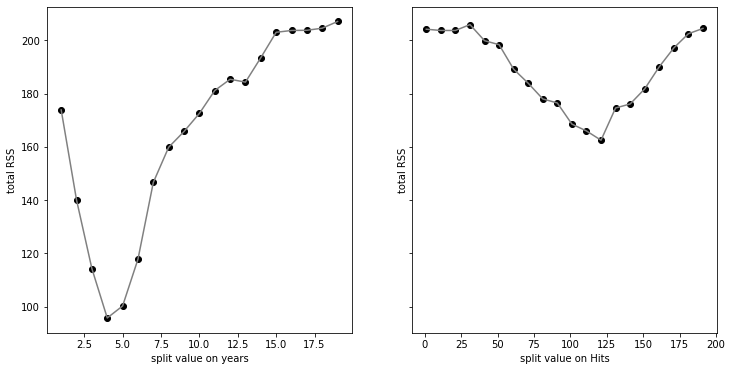

In [11]:
# Plot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=True)

ax1.scatter(range(1, 20), total_rss_list, color='black')
ax1.plot(range(1, 20), total_rss_list, color='gray')
ax1.set_xlabel('split value on years')
ax1.set_ylabel('total RSS');

ax2.scatter(range(1, 200, 10), total_rss_list_hits, color='black')
ax2.plot(range(1, 200, 10), total_rss_list_hits, color='gray')
ax2.set_xlabel('split value on Hits')
ax2.set_ylabel('total RSS');

print('Lowest RSS value from doing split on years: ', min(total_rss_list))
print('Lowest RSS value from doing split on hits: ', min(total_rss_list_hits))

**Recursive binary splitting** = top-down and greedy

- top-down: begins at the top of the tree
- greedy: takes the best split at that particular step, rather than looking ahead for a split that might be better in the future (splitting on years will give a lower error than splitting on hits at this first step)

(Can run sklearn to get the rest of the decision tree)

**Tree pruning**

A tree can have good performance in a training set but it is likely to overfit a test set if it is overly complex. However, you do not want to stop building a tree too soon since a worthless split early (small RSS reduction) could result in a very good split later (large RSS reduction). It is better to grow a large tree first, then prune later to obtain a smaller *subtree*. This can be done by selecting the subtree that leads to the lowest test eror rate.  It'd be cumbersome to generate a cross-validation error for every subtree, since that can be very large. Instead you can employ *cost complexity pruning* find a way to select a small set of subtrees for consideration

**Cost complexity pruning** = weakest link pruning. Analogous to regularization. Consider a sequence of trees indexed by a non-negative tuning parameter $\alpha$. Alpha controls a trade-off between the subtree's complexity and its fit to the training data. When alpha=0, the subtree $T = T_0$ where $T_0$ is the unpruned tree.

**Algorithm for building a regression tree**

1. Use recursive binary splitting to grow a large tree on the training data, stopping only when each terminal node has fewer than some minimum number of observations.
2. Apply cost complexity pruning to the large tree in order to obtain a sequence of best subtrees, as a function of alpha.
3. Use K-fold cross-validation to choose alpha.
    - Repeat steps 1 and 2 on all but the kth fold of the training data.
    - Evaluate the mean squared prediction error on the data in the left-out kth fold, as a function of alpha.
    - Average the results for each value of alpha, and pick alpha to minimize the average error.
4. Return the subtree from step 2 that corresponds to the chosen value of alpha.

### Classification trees

Similar to regression tree, except that it is used to predict a qualitative response rather than a quantitative one. For a classification tree, we predict that each observation belongs to the *most commonly occuring class* of training observations in the region to which it belongs. In interpreting the results of a classification tree, we are often interested not only in the class prediction corresponding to a particular terminal node region, but also in the *class proportions* among the training observations that fall into that region. The metrics used in classification trees for recursive binary splitting are the *Gini index* and *entropy*.

Gini index: a measure of total variance across the K classes.
$G = \sum_{k=1}^K \hat{p_{mk}}(1 - \hat{p_{mk}})$


Entropy: alternatiive but related
$D = -\sum_{k=1}^K \hat{p_{mk}}log\hat{p_{mk}}$

One can show that entropy will take on a value near zero if the $\hat{p_{mk}}$'s are all near zero or near one. Therefore, like the Gini index, the entropy will take on a small value if the *m*th node is pure.

## SKlearn and Medium article for classification

https://scikit-learn.org/stable/modules/tree.html

Info on iris dataset
<br>
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Great explanations
<br>
https://victorzhou.com/blog/intro-to-random-forests/
<br>
https://victorzhou.com/blog/gini-impurity/#recap
<br>
https://victorzhou.com/blog/information-gain/

In [29]:
from sklearn import datasets
from sklearn import tree

In [42]:
iris = datasets.load_iris()
X = iris.data[:, ::2]
y = iris.target

In [53]:
iris.feature_names[0:2]

['sepal length (cm)', 'sepal width (cm)']

In [18]:
#X, y = load_iris(return_X_y=True)

In [43]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [44]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

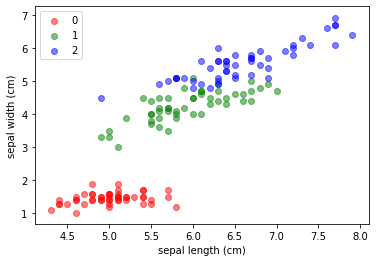

In [66]:
f, ax1 = plt.subplots()
color_list = ['red', 'green', 'blue']
for i in range(3):
    row_bool = y==i
    ax1.scatter(X[row_bool, 0], X[row_bool, 1], color=color_list[i], alpha=0.5, label=i)
ax1.set_xlabel(iris.feature_names[0])
ax1.set_ylabel(iris.feature_names[1])
ax1.legend();

In [57]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

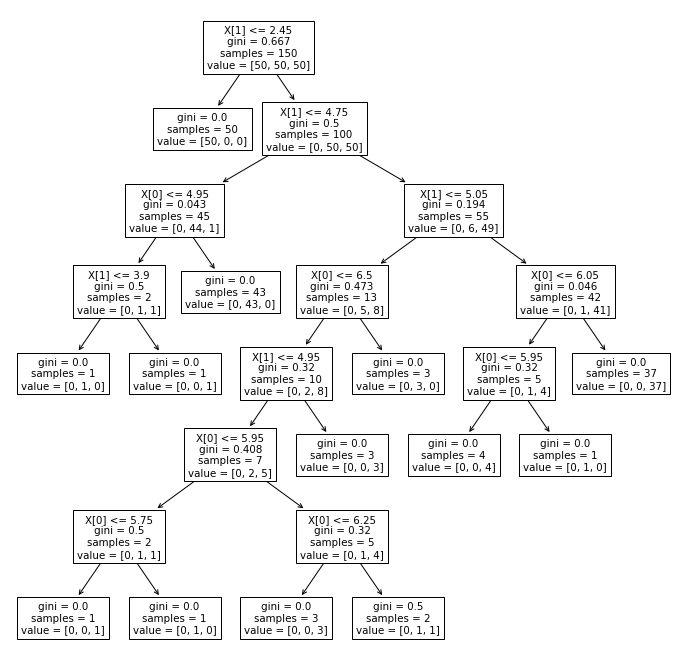

In [58]:
f, ax1 = plt.subplots(figsize=(12,12))
tree.plot_tree(clf.fit(X,y), ax=ax1);

In [51]:
print(clf.feature_importances_)
print(iris.feature_names[0:2])

[0.06786793 0.93213207]
['sepal length (cm)', 'sepal width (cm)']


In [52]:
sum(clf.feature_importances_)

1.0

# Insight QotD

## 4/17/20 (I'm leading)

### Simple vs. multiple linear regression


You create a model to predict the amount of sales of a product. You have features A, B, C, and D.
When you run a multi-variate linear regression model, you find the p-values for the coefficients are significant for A, B, and C but not D. But out of curiosity, you run a simple (univariate) linear regression model with D only and the coefficient comes out to be significant in this model. How do you reconcile both observations?


### Answer

Feature D is really just a surrogate for the contributions of one of the other features, but it is not actually contributing to the target. 


## 4/20/20

# [bottom of notebook]